In [80]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set()
import os

from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.datasets import mnist
from keras.callbacks import EarlyStopping, ModelCheckpoint

### 컨볼루션 신경망(CNN)
컨볼루션 신경망은 입력된 이미지에서 다시 한번 특징을 추출하기 위해 커널(슬라이딩 윈도)을 도입하는 기법

#### 맥스 풀링(Max Pooling)
컨볼루션 층을 통해 도출한 이미지 특징을 다시 한번 축소하는 과정
- 맥스 풀링(max pooling): 정해진 구역 안에서 최댓값을 뽑아낸다
- 평균 풀링(average pooling): 정해진 구역 안에서 평균값을 뽑아낸다

#### 드롭아웃(drop out)
- 과적합을 피하는 간단하고 효과적인 기법
- 은닉층에 배치된 노드 중 일부를 임의로 꺼준다. 랜덤하게 노드를 끔으로써 학습 데이터에 지나치게 치우쳐서 학습되는 과적합을 방지할 수 있다.

#### Flatten
- 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다루기 때문에 1차원 배열로 바꿔주어야 활성화 함수가 있는 층에서 사용할 수 있다.

In [18]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [25]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [27]:
# 4차원으로 변환(개수, 행, 열, 색상 또는 흑백), 0~1 값으로 스케일링
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [32]:
# 행, 열, 색상 또는 흑백
x_train[0].shape

(28, 28, 1)

In [28]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [29]:
# 모델 설정
model = Sequential()
# 32: 커널 개수
# (3, 3): kernel_size
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [33]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [34]:
# 모델 정보
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [37]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

In [40]:
# 모델 실행
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, 
                   verbose=1, callbacks=[earlystopping, checkpointer])

Epoch 1/30
300/300 [==============================] - 102s 340ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0322 - val_accuracy: 0.9890

Epoch 00001: val_loss improved from 0.04190 to 0.03221, saving model to ./model/01-0.0322.hdf5
Epoch 2/30
300/300 [==============================] - 101s 337ms/step - loss: 0.0467 - accuracy: 0.9850 - val_loss: 0.0282 - val_accuracy: 0.9910

Epoch 00002: val_loss improved from 0.03221 to 0.02824, saving model to ./model/02-0.0282.hdf5
Epoch 3/30
300/300 [==============================] - 102s 340ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.0271 - val_accuracy: 0.9906

Epoch 00003: val_loss improved from 0.02824 to 0.02708, saving model to ./model/03-0.0271.hdf5
Epoch 4/30
300/300 [==============================] - 103s 345ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0268 - val_accuracy: 0.9909

Epoch 00004: val_loss improved from 0.02708 to 0.02682, saving model to ./model/04-0.0268.hdf5
Epoch 5/30
300/300 [============

In [42]:
model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 6s 19ms/step - loss: 0.0338 - accuracy: 0.9922


0.9922000169754028

In [43]:
# 트레인셋 오차, 테스트셋 오차 저장
loss = history.history['loss']
v_loss = history.history['val_loss']

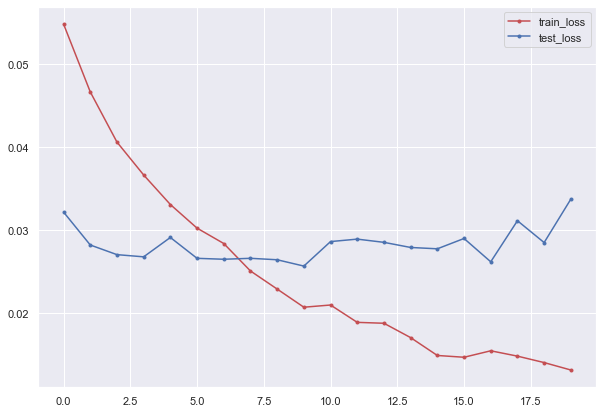

In [47]:
plt.plot(loss, marker='.', c='r', label='train_loss')
plt.plot(v_loss, marker='.', c='b', label='test_loss')
plt.legend()
plt.show()

In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
# 예측
y_pred = np.argmax(model.predict(x_test), axis=1)

In [83]:
# confusion matrix
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,975,0,1,1,0,0,1,0,2,0
1,0,1134,0,0,0,0,1,0,0,0
2,2,2,1023,0,0,0,0,5,0,0
3,0,0,0,1007,0,2,0,0,1,0
4,0,0,0,0,979,0,1,0,0,2
5,2,0,1,3,0,884,1,0,1,0
6,4,2,0,1,1,1,947,0,2,0
7,0,2,5,1,0,0,0,1018,1,1
8,2,1,3,0,0,0,0,1,966,1


In [82]:
# score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [84]:
# 예측을 틀린 데이터 인덱스 추출
result = y_test - y_pred
sr = pd.Series(result != 0)
idx = sr[sr == True].index
idx

Int64Index([ 320,  321,  445,  449,  582,  882, 1014, 1033, 1039, 1226, 1232,
            1242, 1260, 1319, 1393, 1414, 1530, 1554, 1621, 1737, 1790, 1901,
            1903, 2098, 2118, 2130, 2135, 2185, 2189, 2293, 2387, 2406, 2414,
            2462, 2597, 2654, 2896, 2939, 3030, 3225, 3422, 3503, 3520, 3558,
            3727, 3762, 3778, 3808, 3941, 4176, 4497, 4571, 4740, 4761, 5331,
            5937, 5955, 6091, 6560, 6576, 6597, 6625, 6651, 7991, 8059, 8094,
            9009, 9015, 9019, 9530, 9634, 9642, 9664, 9679, 9692, 9729, 9770,
            9839],
           dtype='int64')

In [71]:
# 3차원 변환(개수, 행, 열)
wrong = x_test[idx]
wrong = wrong.reshape(wrong.shape[0], 28, 28)
wrong.shape

(78, 28, 28)

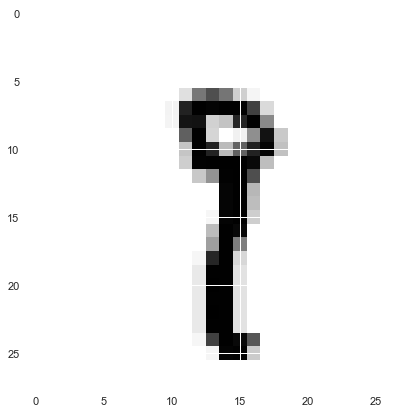

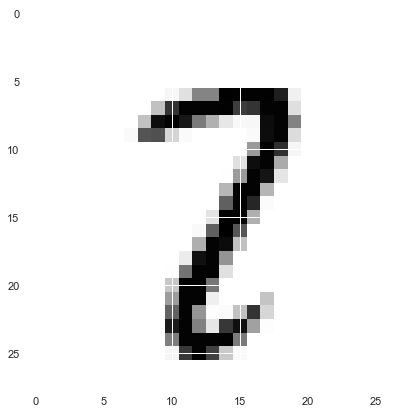

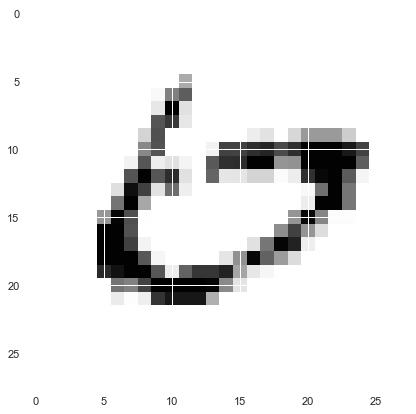

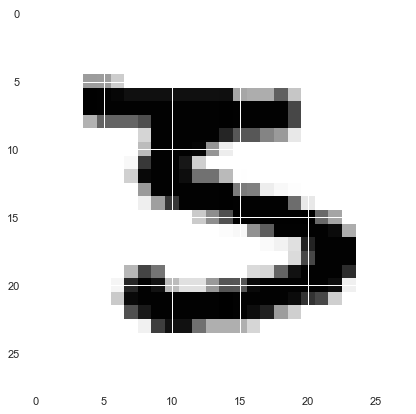

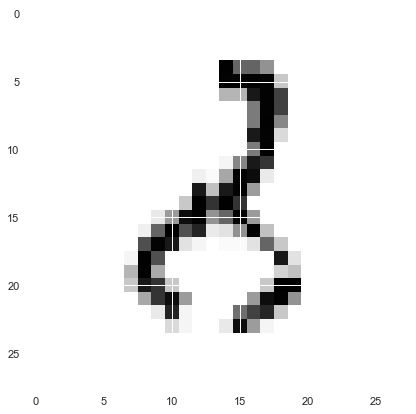

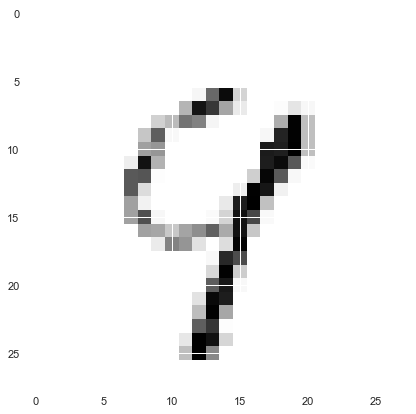

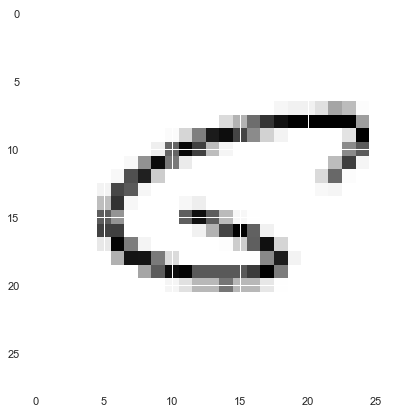

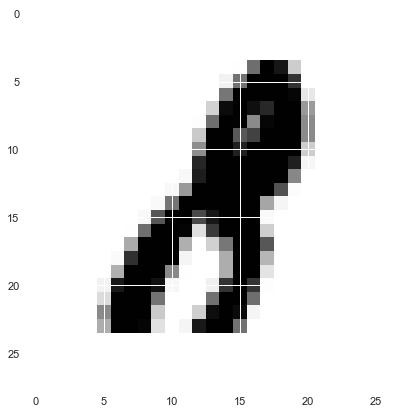

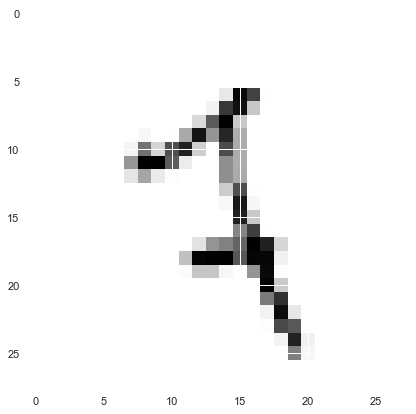

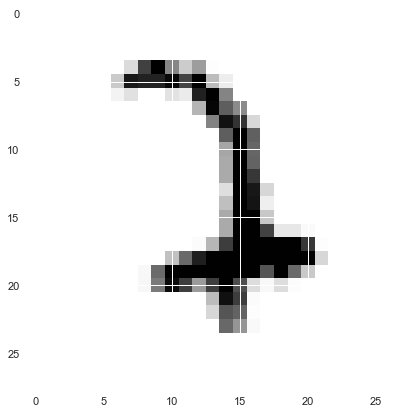

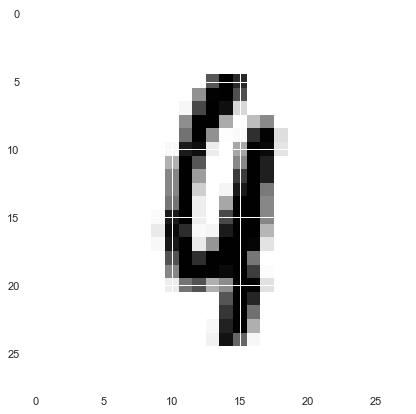

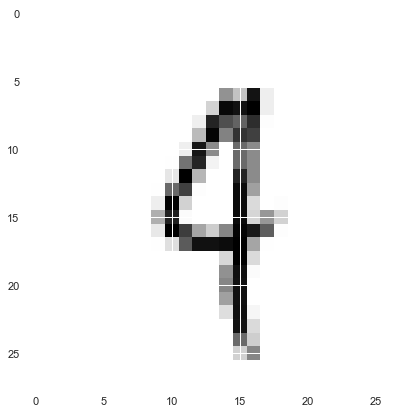

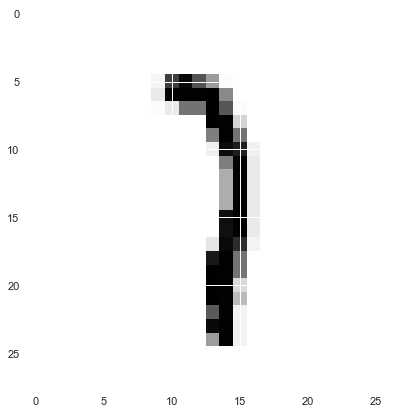

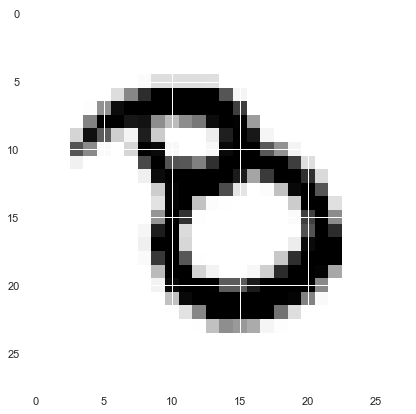

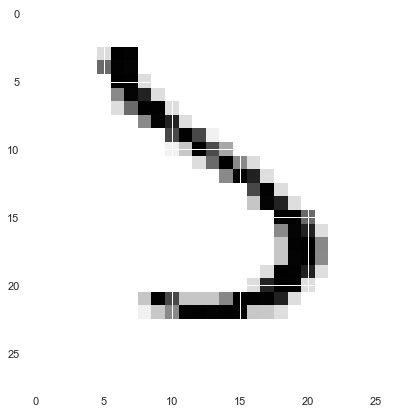

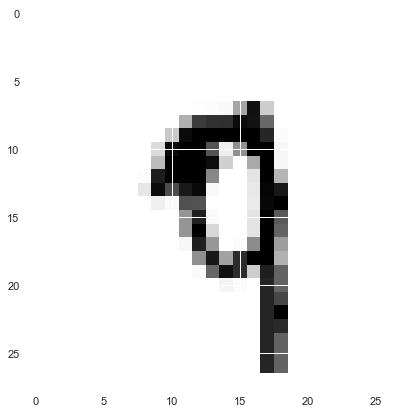

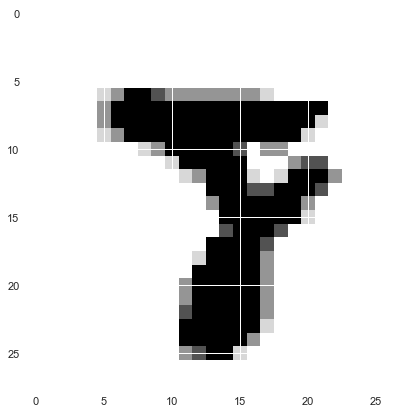

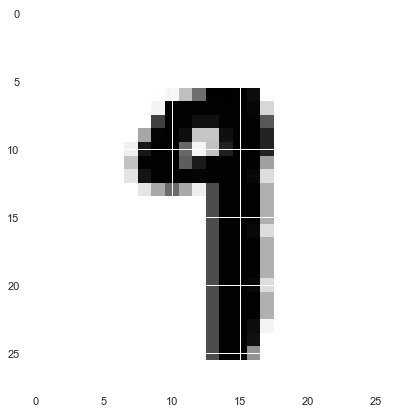

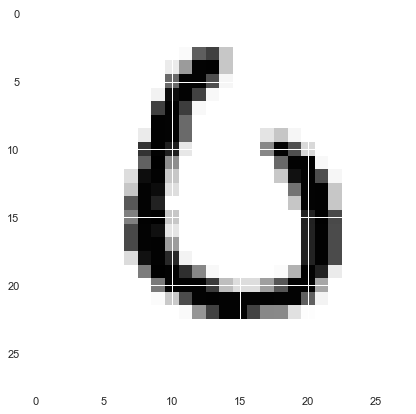

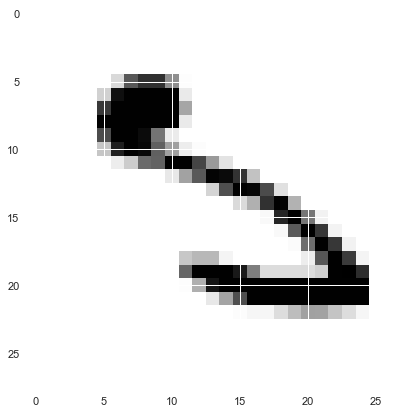

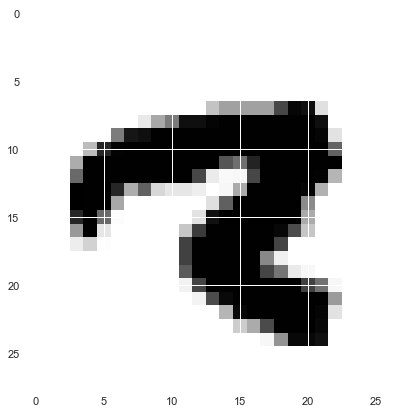

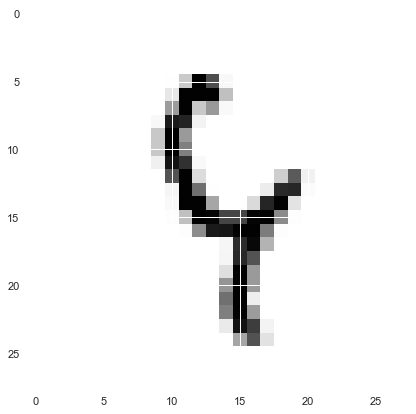

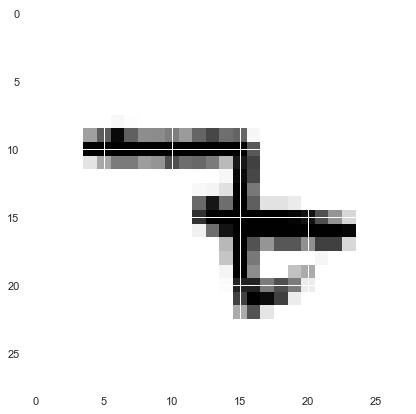

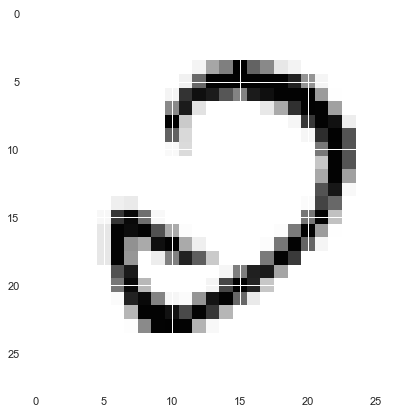

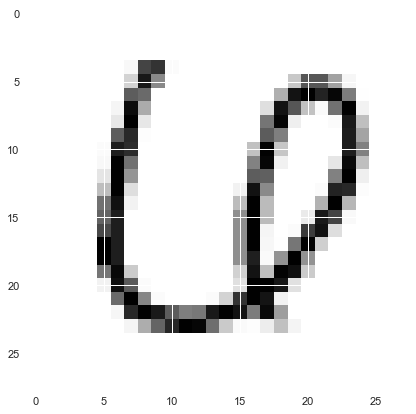

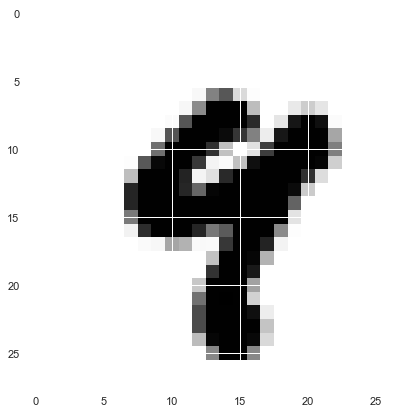

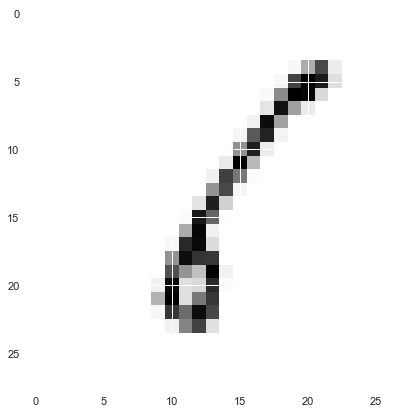

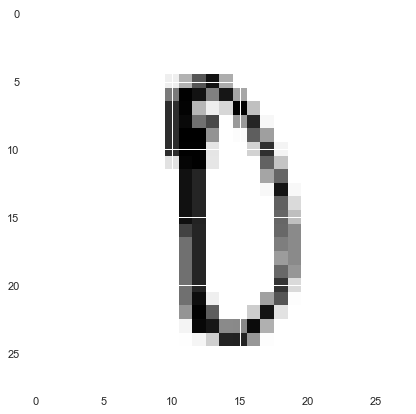

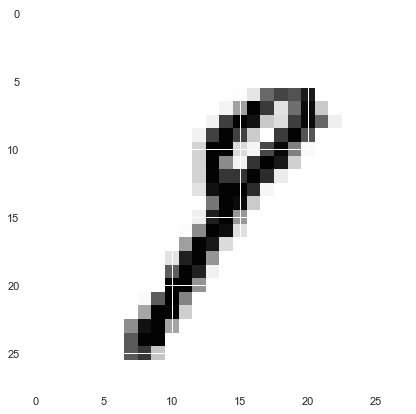

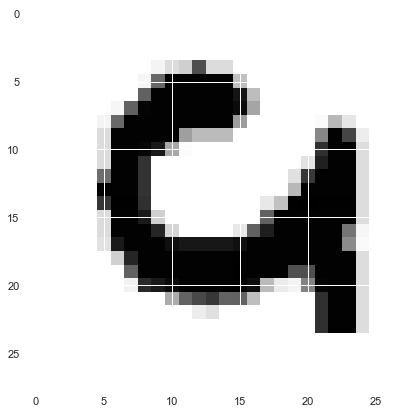

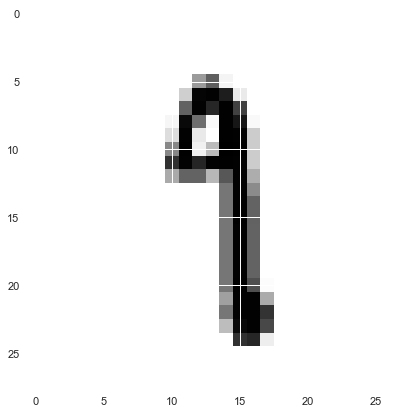

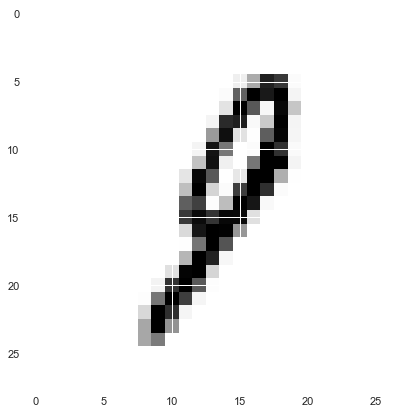

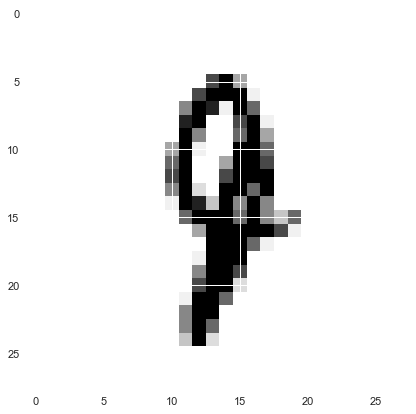

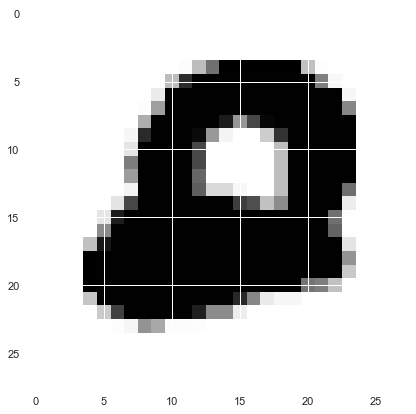

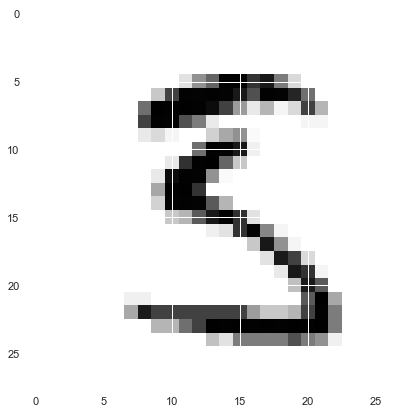

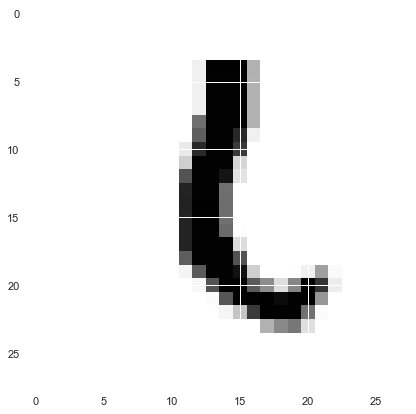

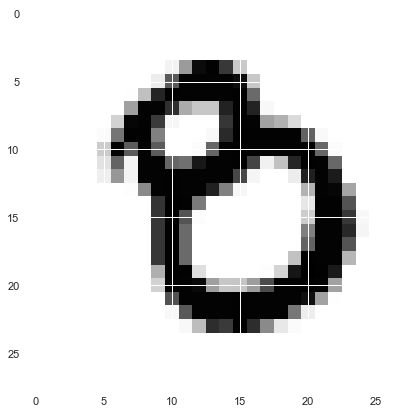

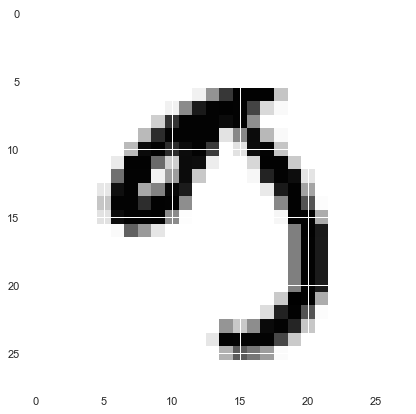

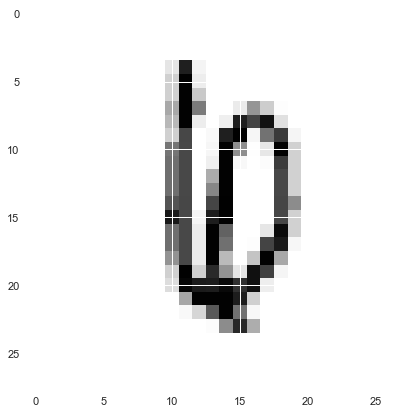

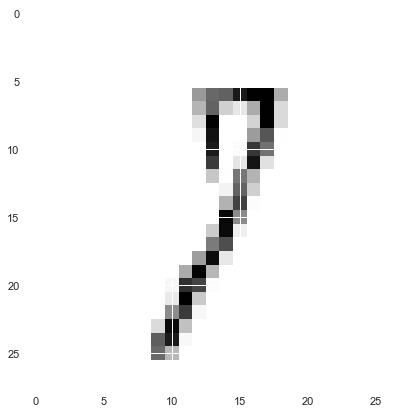

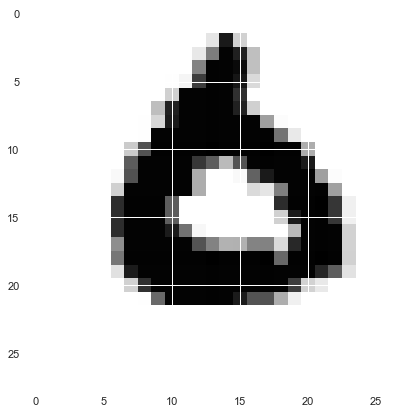

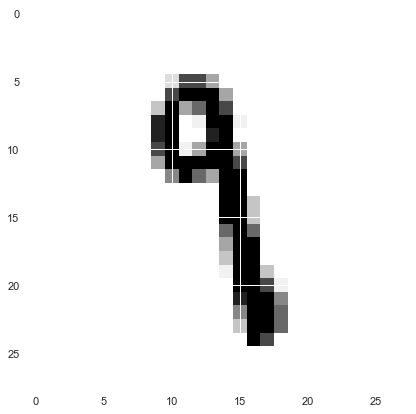

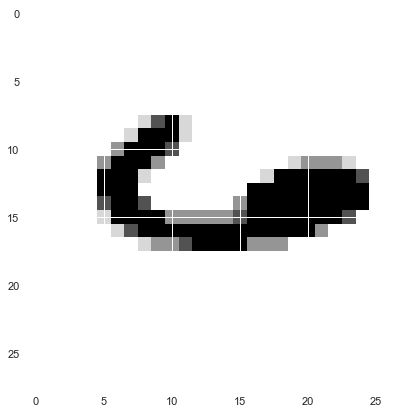

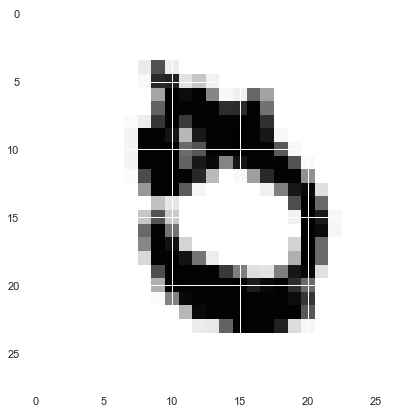

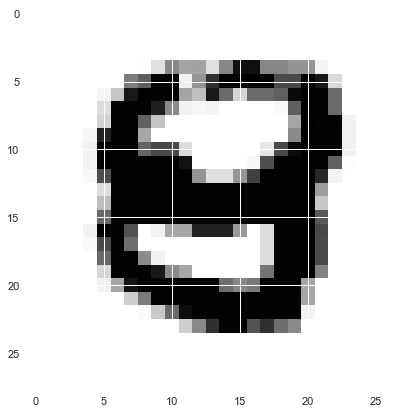

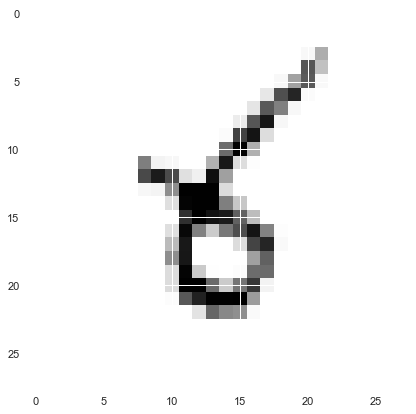

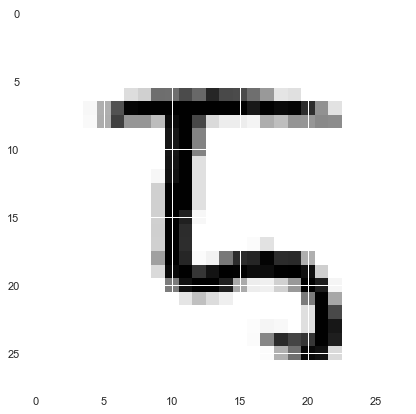

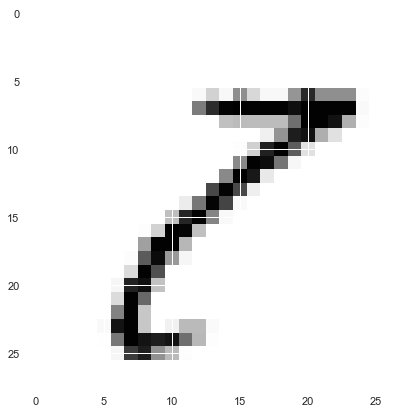

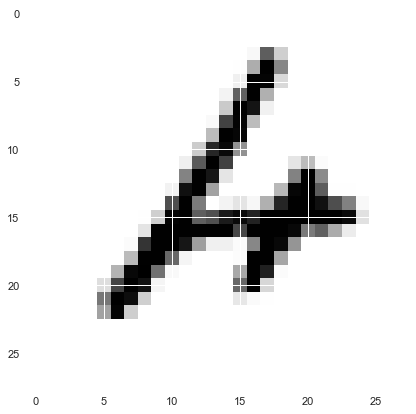

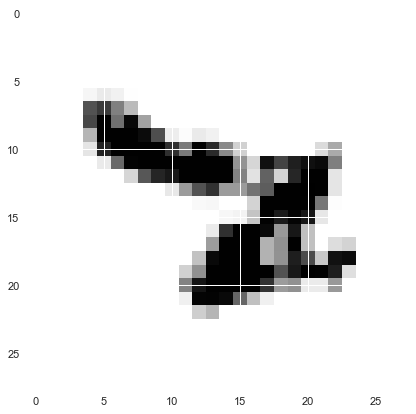

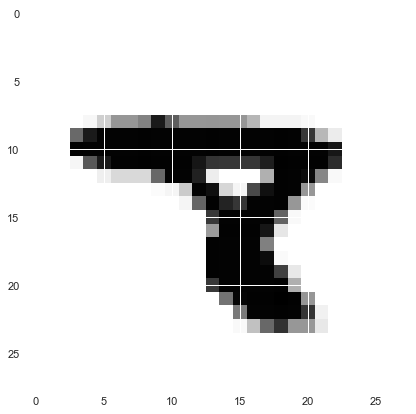

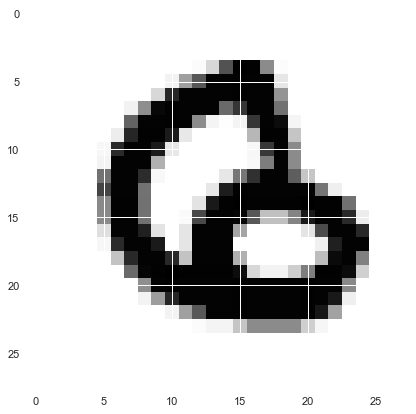

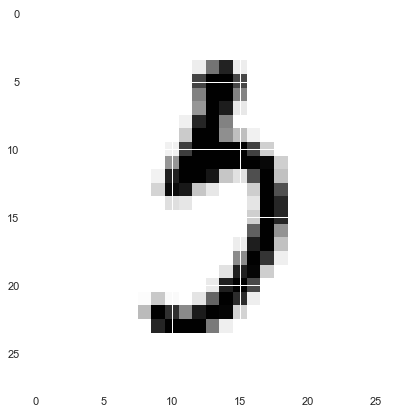

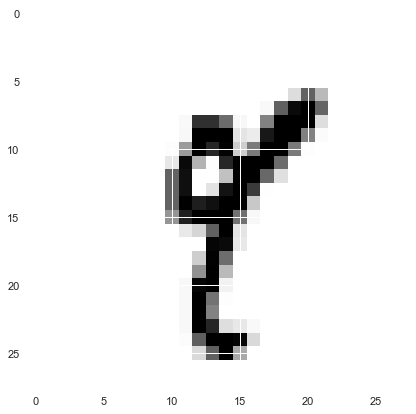

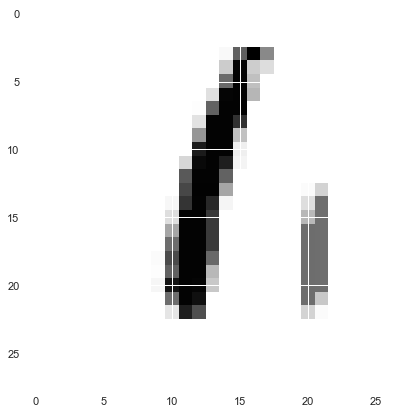

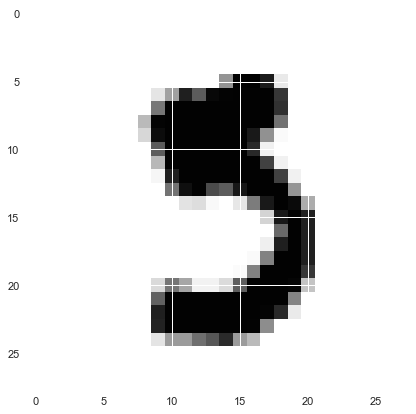

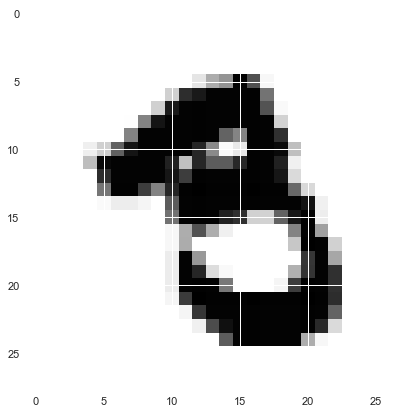

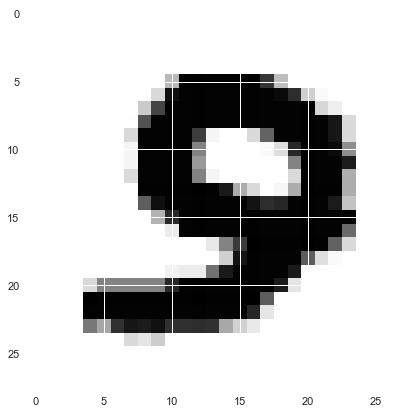

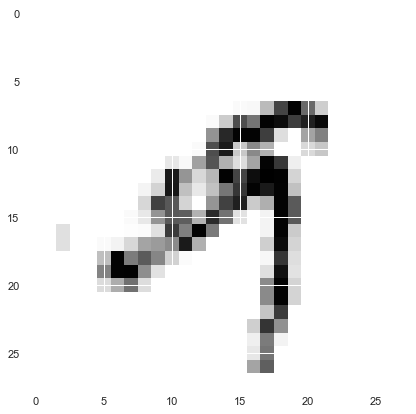

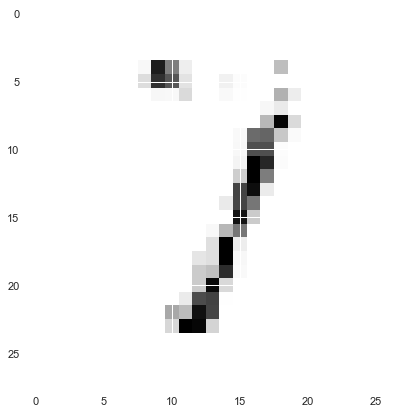

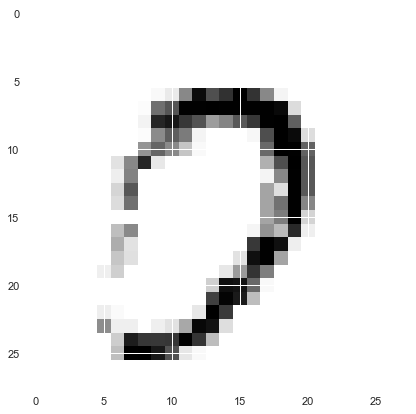

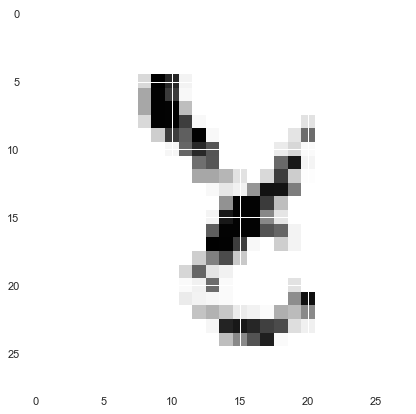

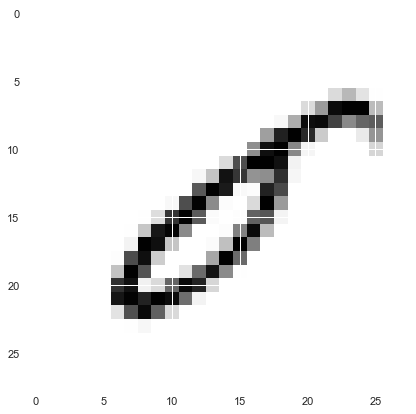

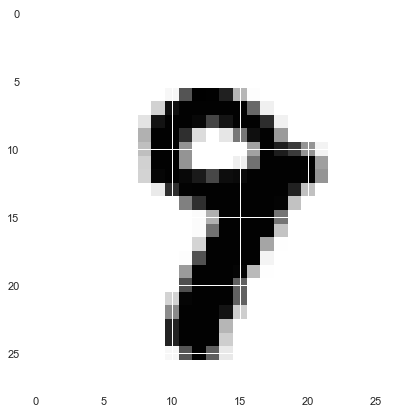

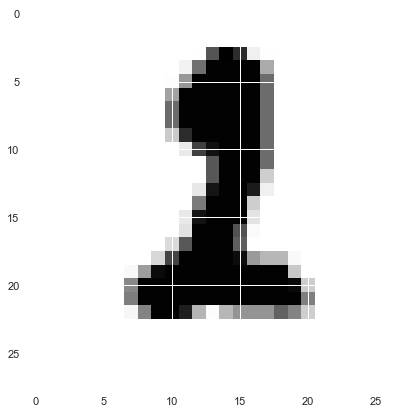

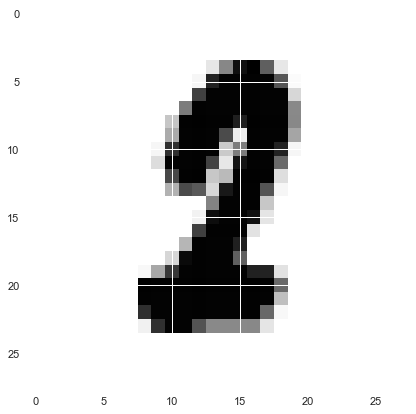

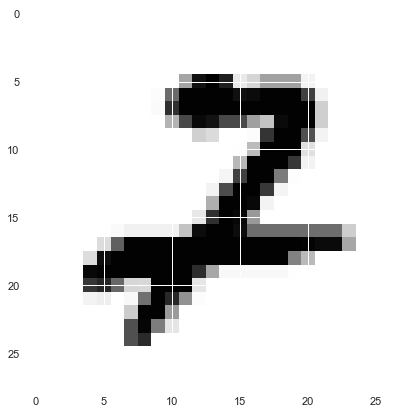

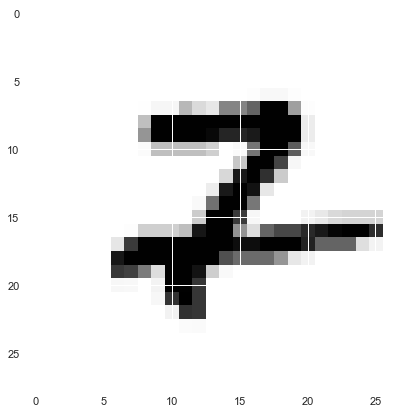

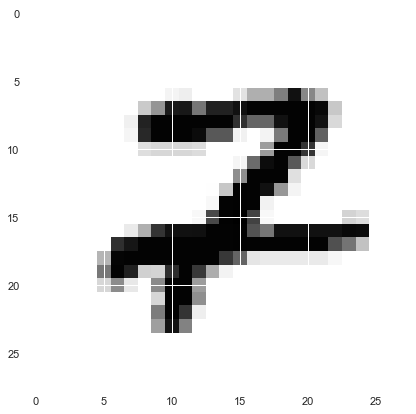

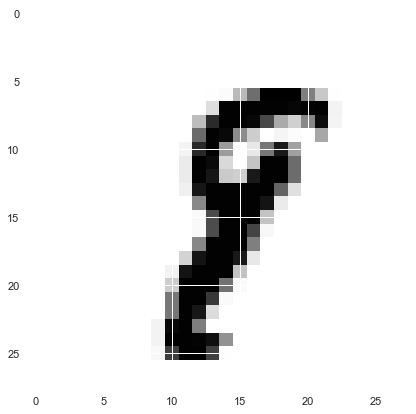

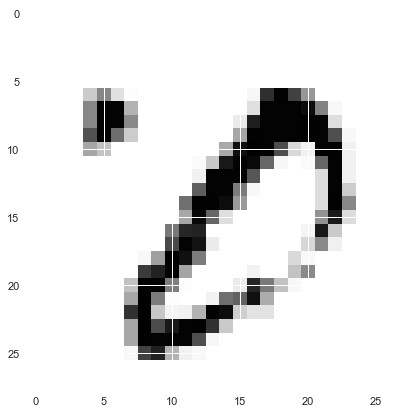

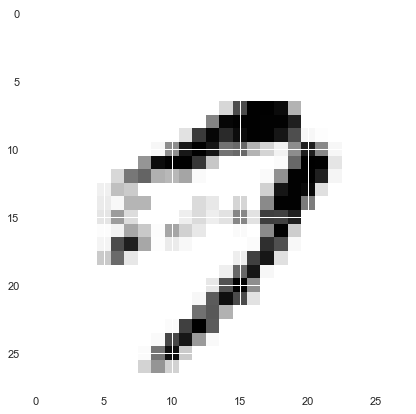

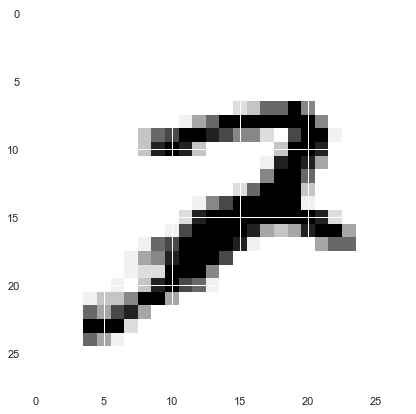

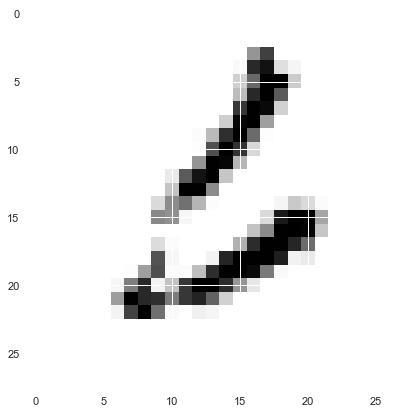

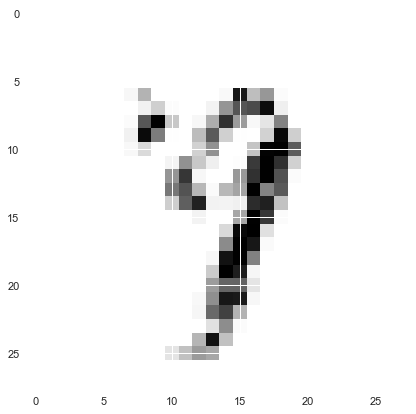

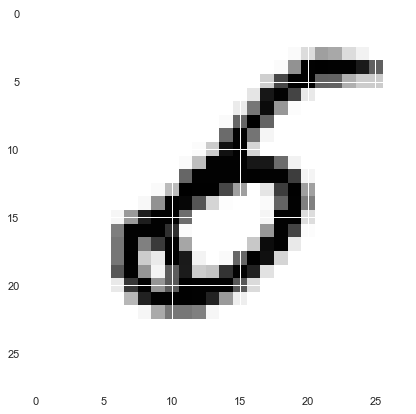

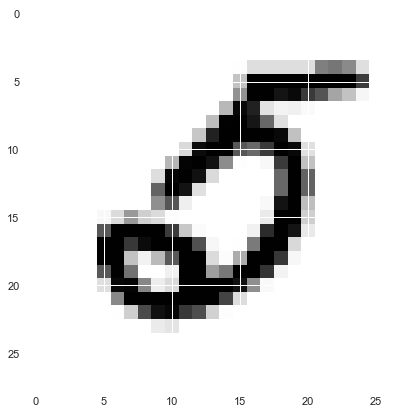

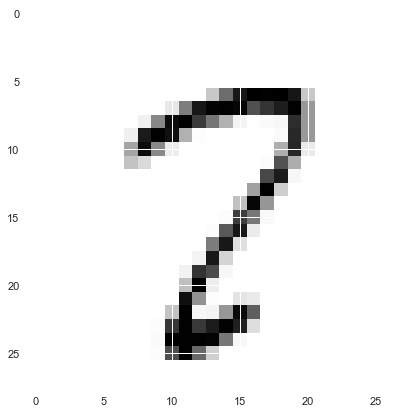

In [79]:
# 틀린 데이터 시각화
for i in range(len(wrong)):
    plt.imshow(wrong[i], cmap='Greys')
    plt.show()